In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

plt.style.use('fivethirtyeight')
#color_pad = plt.rcParams['axes.prod_cycle'].by_key()['color']
from fredapi import Fred

In [2]:
#set Fred api key
fred_key = '635735e8d833607369c43a9d7f98dcd9'
fred = Fred(fred_key)

In [3]:
sp_search = fred.search('S&P', order_by='realtime_end')

In [4]:
sp500 = fred.get_series('SP500')

<Axes: title={'center': 'S&P 500'}>

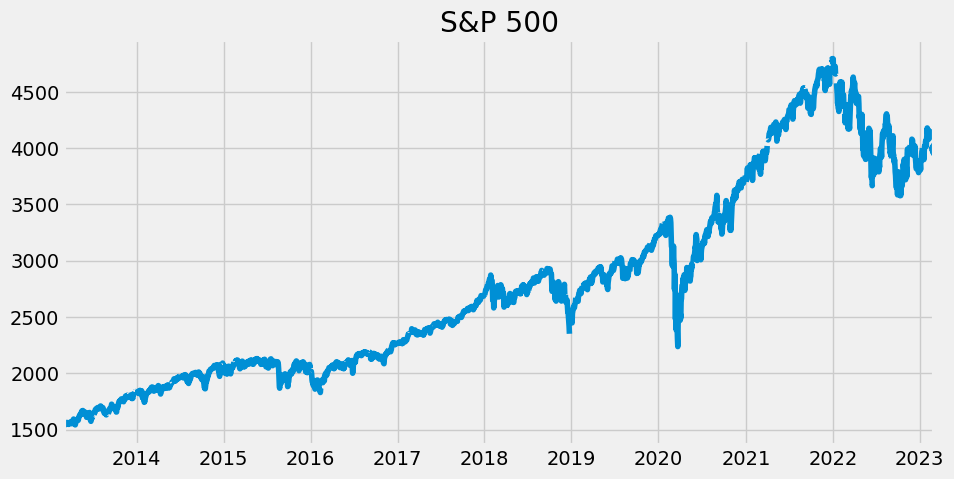

In [5]:
sp500.plot(figsize=(10,5), title='S&P 500')

In [6]:
unemp_rates = fred.search('unemployment')

In [7]:
unemp_rates

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2023-03-06,2023-03-06,Unemployment Rate,1948-01-01,2023-01-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-02-03 07:44:02-06:00,94,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2023-03-06,2023-03-06,Unemployment Rate,1948-01-01,2023-01-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-02-03 07:43:02-06:00,58,The unemployment rate represents the number of...
NROU,NROU,2023-03-06,2023-03-06,Noncyclical Rate of Unemployment,1949-01-01,2032-10-01,Quarterly,Q,Percent,%,Not Seasonally Adjusted,NSA,2022-05-26 13:45:04-05:00,69,"Starting with the July, 2021 report: An Update..."
UNEMPLOY,UNEMPLOY,2023-03-06,2023-03-06,Unemployment Level,1948-01-01,2023-01-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2023-02-03 07:44:05-06:00,69,The series comes from the 'Current Population ...
CCSA,CCSA,2023-03-06,2023-03-06,Continued Claims (Insured Unemployment),1967-01-07,2023-02-18,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2023-03-02 07:41:03-06:00,72,"Continued claims, also referred to as insured ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LNU04000061,LNU04000061,2023-03-06,2023-03-06,"Unemployment Rate - 25-54 Yrs., Men",1948-01-01,2023-01-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-02-03 07:46:08-06:00,3,The series comes from the 'Current Population ...
PUACCNY,PUACCNY,2023-03-06,2023-03-06,Pandemic Unemployment Assistance Continued Cla...,2020-03-28,2022-10-22,"Weekly, Ending Saturday",W,Number,Number,Not Seasonally Adjusted,NSA,2022-11-14 07:33:05-06:00,9,"Continued claims, also referred to as insured ..."
BEND441URN,BEND441URN,2023-03-06,2023-03-06,"Unemployment Rate in Bend-Redmond, OR (MSA)",1990-01-01,2022-12-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-02-01 10:11:29-06:00,2,None


In [8]:
unrate = fred.get_series('UNRATE')

<Axes: >

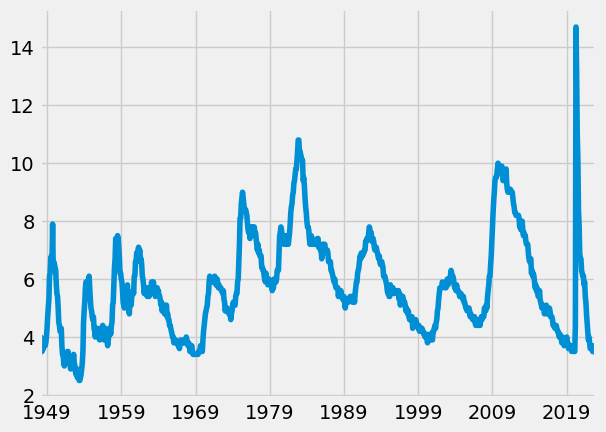

In [9]:
unrate.plot()

In [10]:
unemp_df=fred.search('unemployment rate state', filter=('frequency', 'Monthly'))

In [11]:
unemp_df = fred.search('unemployment_rate_state', filter=('frequency', 'Monthly'))
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]

In [12]:
all_results = []

for myid in unemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
#unemp_results = pd.concat(all_results, axis=1).drop(['M0892AUSM156SNBR', 'DSUR'], axis=1)

In [13]:
unemp_states = unemp_results.drop('UNRATE', axis=1)

NameError: name 'unemp_results' is not defined

In [ ]:
unemp_states